# Handwritten Character Recognition

## Importing Libraries

In [2]:
import tensorflow as tf
import random 
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import widgets

## Exploring Dataset

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

Training label: 5

IMAGE PIXEL ARRAY:

 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

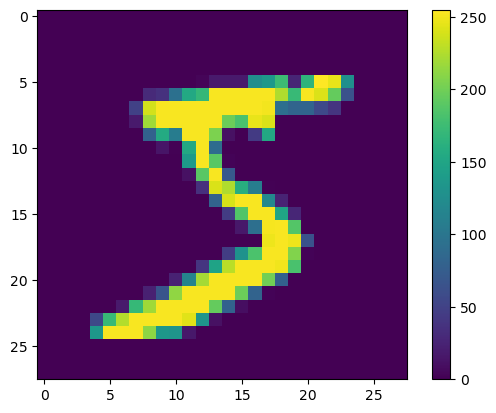

In [6]:
index = 0 
np.set_printoptions(linewidth= 300)
print(f"Training label: {training_labels[index]}")
print(f"\nIMAGE PIXEL ARRAY:\n\n {training_images[index]}\n")

plt.imshow(training_images[index])
plt.colorbar()
plt.show()

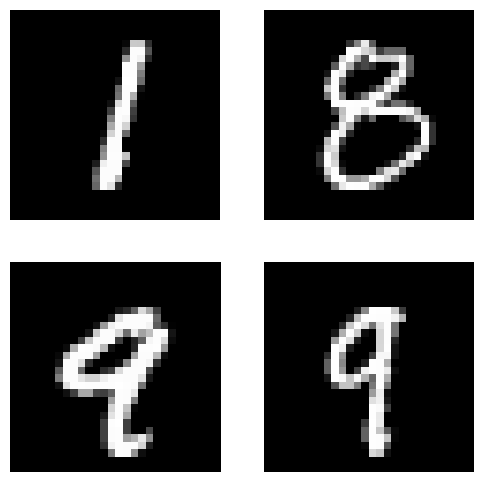

In [7]:
nrows = 2
ncols = 2

fig = plt.gcf()
fig.set_size_inches(nrows*3,ncols*3)

images_pix = [num for num in random.sample(list(training_images),k=4)]

for i , img in enumerate(images_pix):
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis("off")
    plt.imshow(img,cmap= 'gray')


plt.show()
              

## Normalization

In [9]:
training_images = training_images / 255.0
test_images = test_images / 255.0

## Callbacks

In [11]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs= None):
        if logs['accuracy'] >= .95:
            print("\nAcuuracy is greater than .95 so canceling training")
            self.model.stop_training = True
    

## Building Model

In [13]:
model = tf.keras.Sequential([
    tf.keras.Input(shape= (28,28,1)),
    tf.keras.layers.Conv2D(16,(3,3),activation= tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation= tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)        
                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,906 (128.54 KB)

 Trainable params: 32,906 (128.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.optimizers.Adam(learning_rate=.001),
              metrics = ['accuracy'])

In [15]:
history = model.fit(training_images, training_labels,epochs = 15, callbacks= [mycallback()])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8481 - loss: 0.5024
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9729 - loss: 0.0873
Acuuracy is greater than .95 so canceling training
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9729 - loss: 0.0873


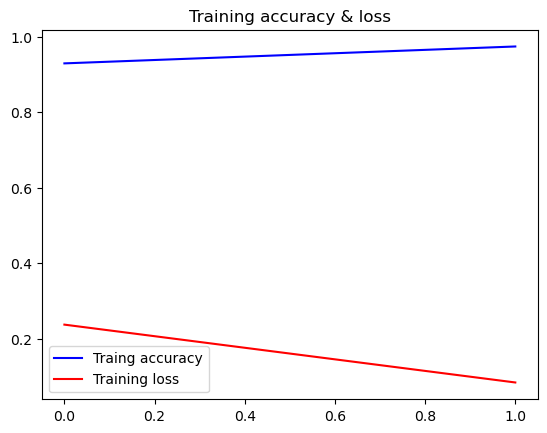

In [16]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b',label = 'Traing accuracy')
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.title('Training accuracy & loss')
plt.legend(loc=0)
plt.show()

In [17]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.1058


[0.08858297765254974, 0.9742000102996826]

## Prediction

In [19]:
classification = model.predict(test_images)
print(classification[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.5621932e-07 5.3026300e-04 6.6947228e-05 5.3203970e-05 3.8319062e-08 8.9485388e-07 4.3368149e-11 9.9932480e-01 5.0160526e-07 2.3006904e-05]


In [20]:
print(test_labels[0])

7


In [21]:
'''
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    image = tf.keras.utils.load_img(file, target_size= (28,28))
    image = tf.keras.utils.img_to_array(image)
    image = image/255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image,verbose = 0)[0][0]

    with out:
        print(prediction)


def on_upload_change(change):
    items = change.new
    for item in items:
        filejpd = BytesIO(item.content)
        file_predict(item.name, filejpd, out)

uploader.observe( on_upload_change, names = 'value')
         '''  

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()